# NAIVE BAYES CLASSIFIER

## Understand the data

### Personal Loan Dataset

### Data Description:


* ID   - Customer ID
* Age   - Customer's age in completed years
* Experience   - #years of professional experience
* Income   - Annual income of the customer (USD000)
* ZIPCode   - Home Address ZIP code.
* Family   - Family size of the customer
* CCAvg   - Avg. spending on credit cards per month ( USD000)
* Education   - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage   - Value of house mortgage if any. ($000)
* Personal Loan   - Did this customer accept the personal loan offered in the last campaign?
* Securities Account   Does the customer have a securities account with the bank?
* CD Account   - Does the customer have a certificate of deposit (CD) account with the bank?
* Online   - Does the customer use internet banking facilities?
* CreditCard   - Does the customer use a credit card issued by UniversalBank?



Age,experience and income are dependent variables

## Implement the model using Python

#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

%matplotlib inline

#### Load Dataset

In [4]:
df=pd.read_csv('UniversalBank.csv')
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df['Mortgage']

0         0
1         0
2         0
3         0
4         0
5       155
6         0
7         0
8       104
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16      134
17        0
18        0
19        0
20      111
21        0
22      260
23      163
24      159
25       97
26        0
27        0
28        0
29        0
       ... 
4970      0
4971      0
4972    148
4973      0
4974      0
4975      0
4976      0
4977      0
4978      0
4979    213
4980      0
4981    122
4982      0
4983      0
4984      0
4985    162
4986      0
4987    159
4988    136
4989      0
4990    219
4991    100
4992      0
4993      0
4994      0
4995      0
4996     85
4997      0
4998      0
4999      0
Name: Mortgage, Length: 5000, dtype: int64

#### NO OF Rows and Columns in the data

In [3]:
df.shape

(5000, 14)

#### Summary of the data

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### check to if DATA is in which Form Numeric or Categorical?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Check if any Null values?

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### NO Null Values in the data

In [7]:
df['ZIP Code'].value_counts(normalize=True).head(12)

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
92037    0.0108
93943    0.0108
91320    0.0106
91711    0.0104
94025    0.0104
92093    0.0102
90245    0.0100
Name: ZIP Code, dtype: float64

In [8]:
df = df.drop(['ID', 'ZIP Code'], axis=1)

In [9]:
df['Personal Loan'].value_counts(normalize = True)                         #means that the data is 'imbalanced data'

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [10]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [6]:
df['Education'] = df['Education'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')

#### Grouping Based On Outcome

In [7]:
#Group numerical variables by mean
df.groupby("Personal Loan").mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage
Personal Loan,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,51.789381
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,100.845833


#### Correlation Matrix of Variables using HeatMap

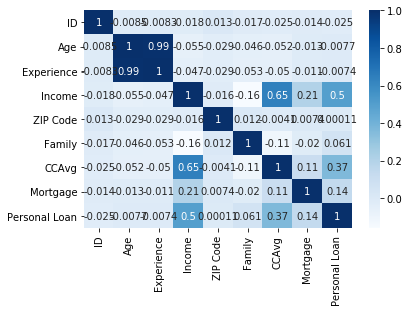

In [8]:
corr = df[df.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

#### Featues

In [14]:
#Create dataframes for X and Y variables
x = df.drop(["Personal Loan"], axis=1)
y = df[['Personal Loan']]


In [15]:
##Convert x to dummy variables
x=pd.get_dummies(x, drop_first=True)

In [16]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

#### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)                          # helps to comapre 'x' variables to check collinearity

#### Classifier Invoking

In [21]:
from sklearn.naive_bayes import BernoulliNB

optimal_alpha = 1
NB_optimal = BernoulliNB(alpha=optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [22]:
y_pred_B = NB_optimal.predict(X_test)
y_pred_B

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Evaluation Metrics

In [43]:
cm_B = confusion_matrix(y_test, y_pred_B)
print(cm_B)

[[1338   16]
 [ 109   37]]


In [30]:

print(recall_score(y_test, y_pred_B))

0.2534246575342466
